In [17]:
import osmnx as ox
import pandas as pd
import numpy as np
import networkx as nx

import os
import sys
import pickle
import seaborn as sns

import re

from matplotlib import ticker
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [3]:
#ROOT_DIR = "/home/charles/Projects/QcMtlStreets"
#ROOT_DIR = "/home/dhw3172/projects/qcMtlStreets"
ROOT_DIR = "/home/charles.gauvin/projects/qcMtlStreets"
sys.path.append(os.path.join(ROOT_DIR, "Python"))   
os.chdir(ROOT_DIR)

In [4]:
filePathPickle=os.path.join(ROOT_DIR,"Data","Pickle", "graphElevationGradesNeighQc.pickle")
if os.path.isfile(filePathPickle):
    print("File exists => reading graph")
    pickle_inQc = open(filePathPickle,"rb")
    graphQc = pickle.load(pickle_inQc)

File exists => reading graph


In [13]:
list(nx.get_edge_attributes(graphQc,"grade").values())[:2]

[-0.0106, -0.0042]

In [10]:
list(nx.get_node_attributes(graphQc,"elevation").values())[:2]

[59.754, 58.95]

In [82]:
#[ list(dat.keys()) for u,v, dat in graphQc.edges.data() ]

In [19]:
def getSafeNeigh(n,dat):
    try:
        neigh=dat["Neighbourhood"]
    except Exception as e:
        #print("Fatal error at node " , n , dat , str(e))
        neigh=""
        
    return(neigh)

In [75]:
sjbNodes=[n for n, dat in graphQc.nodes.data() if re.match(".*Saint-J.*", getSafeNeigh(n,dat)) is not None ]
sRNodes=[n for n, dat in graphQc.nodes.data() if re.match(".*Saint-Roch.*", getSafeNeigh(n,dat)) is not None ]
vQcNodes=[n for n, dat in graphQc.nodes.data() if re.match(".*Vieux-Q.*", getSafeNeigh(n,dat)) is not None ]

In [100]:
def getEdgesFromInducedSubgraph(graph,nodeList,featuresExtractListNames):
    
    graphInduced=ox.utils.induce_subgraph(graph,nodeList)
    listEdges=[(u,v) for u,v, dat in graphInduced.edges.data() ]
    listFeatures={}
    
    dfEdges=pd.DataFrame({"Edge": listEdges})
    
    for l in featuresExtractListNames:
        try:
            #listFeatures[l] = nx.get_edge_attributes(graphInduced,l) #humm. nx.get_edge_attributes returns a dict where the keys are edges u,v and in the case of a multigraph u,v,w
            listFeatures[l] = [dat[l] for u,v,dat in graphInduced.edges.data()]  #this really returns a list
        except Exception as e:
            print("Fatal error with feature ", l)
            listFeatures[l] = None
            
        dfEdges[l] = listFeatures[l]
    
    return(dfEdges, listEdges, listFeatures)

In [101]:
#[ dat["grade"] for u,v,dat in graphQc.edges.data() ]
#[ dat for u,v,dat in graphQc.edges.data() ]

In [102]:
dfEdges, listEdges, featuresExtractList = getEdgesFromInducedSubgraph(graphQc, sjbNodes, ["grade"] )


In [103]:
dfEdges.head()

Edge   grade
0    (177476621, 177476195) -0.0425
1    (177476621, 176302007) -0.1165
2   (177476621, 3114859311)  0.0571
3  (2837597201, 2837573474)  0.0037
4  (2837597201, 2837597102) -0.0192

In [59]:
graphInducedSJB=ox.utils.induce_subgraph(graphQc,sjbNodes)

In [72]:
sjbEdges=[(u,v) for u,v, dat in graphInducedSJB.edges.data() ]
sjbEdgesGrades=[dat["grade"] for u,v, dat in graphInducedSJB.edges.data() ]
print(len(sjbEdges), len(sjbNodes))
sjbEdges[:2]

795 408


[(177476621, 177476195), (177476621, 176302007)]

In [70]:
edgesSJBBothEndpoints=nx.edge_boundary(graphQc, sjbNodes, sjbNodes ) 
graphPartialSJB=nx.Graph(edgesSJBBothEndpoints)
print(len(graphPartialSJB.edges), len(graphPartialSJB.nodes ) )

500 405


In [71]:
listEdgesInSJBBothEndpoints=[ e for e in edgesSJBBothEndpoints] 

In [41]:
listEdgesInSJBBothEndpoints[:2]

[(1832232979, 1832232985), (177475608, 177476195)]

In [52]:
ox.su

In [54]:
#graphPartialSJB=graphQc.edge_subgraph(edgesSJBBothEndpoints)

In [56]:
[ (n,dat) for n,dat in graphPartialSJB.nodes(data=True) ][:2]

[(177476621, {}), (2837597201, {})]

In [58]:
[ (u,v,dat) for u,v,dat in graphPartialSJB.edges(data=True) ][:2]

[(177476621, 177476195, {}), (177476621, 176302007, {})]

In [62]:
#ox.projection.project_graph(graphPartialSJB)

In [61]:
#ox.plot_graph(graphInducedSJB)

In [74]:
pd.DataFrame({"Edges": sjbEdges, "Grade": sjbEdgesGrades, "Neighbourhood": ["Saint-Jean-Baptiste" for i in range(len(sjbEdgesGrades))]})

Edges   Grade        neighbourhood
0      (177476621, 177476195) -0.0425  Saint-Jean-Baptiste
1      (177476621, 176302007) -0.1165  Saint-Jean-Baptiste
2     (177476621, 3114859311)  0.0571  Saint-Jean-Baptiste
3    (2837597201, 2837573474)  0.0037  Saint-Jean-Baptiste
4    (2837597201, 2837597102) -0.0192  Saint-Jean-Baptiste
5    (1832232979, 1832232985) -0.1264  Saint-Jean-Baptiste
6      (177475608, 177476195) -0.0324  Saint-Jean-Baptiste
7      (177475608, 165217796) -0.0303  Saint-Jean-Baptiste
8      (177475608, 304830503)  0.0296  Saint-Jean-Baptiste
9    (1832232985, 2477818971) -0.2838  Saint-Jean-Baptiste
10   (2339446810, 2753957347) -0.0618  Saint-Jean-Baptiste
11   (2339446810, 1690445292)  0.0564  Saint-Jean-Baptiste
12   (2339446810, 2339446823)  0.0112  Saint-Jean-Baptiste
13    (385038203, 2380362214)  0.0251  Saint-Jean-Baptiste
14   (1832232993, 4185754193)  0.0483  Saint-Jean-Baptiste
15   (1832232993, 4185824794) -0.1477  Saint-Jean-Baptiste
16   (1832232993, 1832232924) -0.1492  Saint-Jean-Baptiste
17     (165083105, 165083104)  0.0173  Saint-Jean-Baptiste
18     (165083105, 165093348) -0.1595  Saint-Jean-Baptiste
19   (6026656234, 3870182072)  0.1875  Saint-Jean-Baptiste
20   (6026656234, 3870182073) -0.0285  Saint-Jean-Baptiste
21   (6026656234, 4790692731) -0.1371  Saint-Jean-Baptiste
22    (6026656234, 164925595)  0.0381  Saint-Jean-Baptiste
23    (164920357, 5625075011)  0.1398  Saint-Jean-Baptiste
24   (2339446823, 2339446810) -0.0112  Saint-Jean-Baptiste
25   (4185883689, 4185883789) -0.0958  Saint-Jean-Baptiste
26    (1690445319, 165064562) -0.0679  Saint-Jean-Baptiste
27   (1690445319, 2753957348)  0.0890  Saint-Jean-Baptiste
28    (1690445319, 165059846) -0.0225  Saint-Jean-Baptiste
29    (165083108, 2920171972)  0.0493  Saint-Jean-Baptiste
..                        ...     ...                  ...
765    (202874020, 202874732)  0.1196  Saint-Jean-Baptiste
766    (165083099, 165079819)  0.0866  Saint-Jean-Baptiste
767  (1832232924, 1832232979) -0.1313  Saint-Jean-Baptiste
768   (165083102, 4723196431)  0.0177  Saint-Jean-Baptiste
769    (377488351, 165062883) -0.0398  Saint-Jean-Baptiste
770    (165083104, 165080634)  0.0973  Saint-Jean-Baptiste
771    (165083104, 165083102)  0.0550  Saint-Jean-Baptiste
772    (377488353, 165059851)  0.1139  Saint-Jean-Baptiste
773  (6203359202, 2753957359) -0.0043  Saint-Jean-Baptiste
774   (6203359202, 165059847) -0.1338  Saint-Jean-Baptiste
775    (165083107, 165094858)  0.0328  Saint-Jean-Baptiste
776    (165083107, 165094887) -0.1690  Saint-Jean-Baptiste
777    (165093348, 165094859) -0.0066  Saint-Jean-Baptiste
778   (345923562, 1740959858)  0.0002  Saint-Jean-Baptiste
779    (345923562, 345923564) -0.0010  Saint-Jean-Baptiste
780    (202874023, 377490550)  0.0752  Saint-Jean-Baptiste
781    (345923564, 345923562)  0.0010  Saint-Jean-Baptiste
782   (345923564, 1740959883)  0.0386  Saint-Jean-Baptiste
783    (345923565, 345923154) -0.0385  Saint-Jean-Baptiste
784   (345923565, 1740959883) -0.0182  Saint-Jean-Baptiste
785    (345923565, 345923791) -0.0563  Saint-Jean-Baptiste
786   (345923568, 4458390656)  0.0926  Saint-Jean-Baptiste
787    (345923568, 345923791)  0.0466  Saint-Jean-Baptiste
788  (4186335222, 4186335223) -0.1197  Saint-Jean-Baptiste
789   (4186335223, 165059858) -0.0430  Saint-Jean-Baptiste
790   (176293880, 2753894621)  0.1138  Saint-Jean-Baptiste
791   (176293880, 3641147270)  0.0359  Saint-Jean-Baptiste
792   (4186335225, 165059858)  0.0720  Saint-Jean-Baptiste
793   (3812156411, 165062874)  0.0329  Saint-Jean-Baptiste
794   (4186335228, 165062882)  0.0430  Saint-Jean-Baptiste

[795 rows x 3 columns]

In [105]:
listNeigh=["Saint-J","Saint-R"]

In [114]:
dfAll=pd.DataFrame()
for neighStr in listNeigh:
    listNodes=[n for n, dat in graphQc.nodes.data() if re.match(".*" + neighStr + ".*", getSafeNeigh(n,dat)) is not None ]
    dfEdges, listEdges, featuresExtractList = getEdgesFromInducedSubgraph(graphQc, listNodes, ["grade"] )
    dfEdges["Neighoburhood"] = [neighStr for i in range(dfEdges.shape[0]) ]
    dfAll=pd.concat([dfAll,dfEdges])

In [115]:
dfAll.shape

(4797, 3)

In [116]:
dfAll.head()

Edge   grade Neighoburhood
0    (177476621, 177476195) -0.0425       Saint-J
1    (177476621, 176302007) -0.1165       Saint-J
2   (177476621, 3114859311)  0.0571       Saint-J
3  (2837597201, 2837573474)  0.0037       Saint-J
4  (2837597201, 2837597102) -0.0192       Saint-J

/anaconda/envs/py35/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


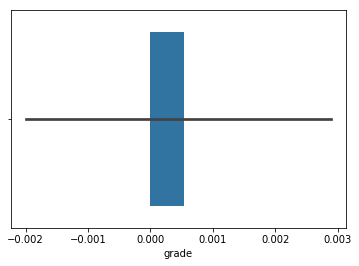

In [120]:
sns.barplot(x="grade", data=dfAll)